In [279]:
from constants import POMS_MLM_DATA_DIR, POMS_GENDER_DATA_DIR, POMS_RACE_DATA_DIR, SENTIMENT_MLM_PRETRAIN_DATA_DIR, SENTIMENT_IMA_PRETRAIN_DATA_DIR, SENTIMENT_TOPICS_PRETRAIN_MLM_DIR, SENTIMENT_TOPICS_PRETRAIN_ITX_DIR, CAUSALM_DIR
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [280]:
POMS_MLM_LOSSES = f"{POMS_MLM_DATA_DIR}/model_enriched_noisy/losses.csv"
GENDER_LOSSES = f"{POMS_GENDER_DATA_DIR}/model_enriched_noisy/losses.csv"
RACE_LOSSES = f"{POMS_RACE_DATA_DIR}/model_enriched_noisy/losses.csv"

IMA_MLM_LOSSES = f"{SENTIMENT_MLM_PRETRAIN_DATA_DIR}/double_num_adj/unified/model/losses.csv"
IMA_LOSSES = f"{SENTIMENT_IMA_PRETRAIN_DATA_DIR}/double_num_adj/unified/model/losses.csv"
IMA_CONTROL_LOSSES = f"{SENTIMENT_IMA_PRETRAIN_DATA_DIR}/double_num_adj/unified/model_control/losses.csv"

TOPICS_MLM_LOSSES = f"{SENTIMENT_TOPICS_PRETRAIN_MLM_DIR}/books/model/losses.csv"
TOPICS_LOSSES = f"{SENTIMENT_TOPICS_PRETRAIN_ITX_DIR}/books/model/losses.csv"
TOPICS_CONTROL_LOSSES = f"{SENTIMENT_TOPICS_PRETRAIN_ITX_DIR}/books/model_control/losses.csv"

FIGURES_DIR = f"{CAUSALM_DIR}/Figures"

In [281]:
def plot_losses(ax, losses_file, loss_columns, title, agg_f=None, mlm_factor=None):
    df = pd.read_csv(losses_file, usecols=["epoch"]+list(loss_columns.keys()))
    df = df.rename(loss_columns, axis=1)
    window_size = 300
    if mlm_factor:
        window_size = int(window_size/mlm_factor)
    if agg_f == "mean":
        df_agg = df.rolling(window_size).mean().iloc[::window_size, :]
    elif agg_f == "std":
        df_agg = df.rolling(window_size).std().iloc[::window_size, :]
    for col in loss_columns.values():
        ax.plot(df_agg[col].to_numpy(), label=f"{title} {col.split('_')[0]}")
    ax.set_xlabel(f"{window_size} training steps")
    ax.set_ylabel(f"{agg_f} loss")
    ax.legend(loc='upper right')
    ax2 = ax.twiny()
    ax2labels = list(range(len(df["epoch"].unique())+1))
    epoch2steps = lambda x: x*len(df)/window_size/(len(ax2labels)-1)
    ax2pos = [epoch2steps(i) for i in ax2labels]
    ax2.set_xticks(ax2pos)
    ax2.set_xticklabels([i for i in ax2labels])
    ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
    ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
    ax2.spines['bottom'].set_position(('outward', 36))
    ax2.set_xlabel('epoch')
    ax2.set_xlim(ax.get_xlim())

# Gender

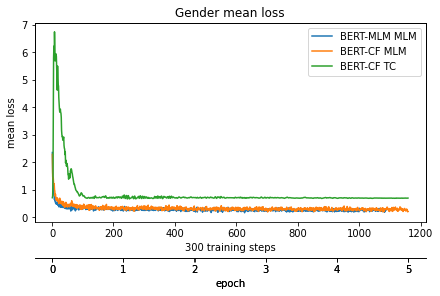

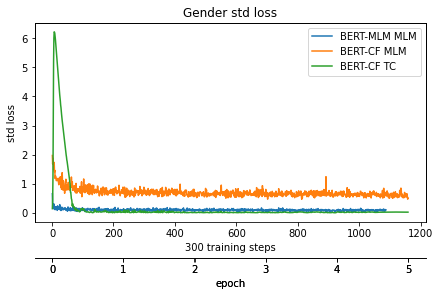

In [282]:
TREATMENT = "Gender"
for agg_f in ("mean", "std"):
    fig, ax = plt.subplots(constrained_layout=True)
    plot_losses(ax, POMS_MLM_LOSSES, {"mlm_loss": "MLM_loss"}, "BERT-MLM", agg_f, 30)
    plot_losses(ax, GENDER_LOSSES, {"mlm_loss": "MLM_loss", "adversarial_loss": "TC_loss"}, "BERT-CF", agg_f)
    ax.set_title(f"{TREATMENT} {agg_f} loss")
    plt.savefig(f"{FIGURES_DIR}/{TREATMENT}_{agg_f}_loss.png")
    plt.show()

# Race

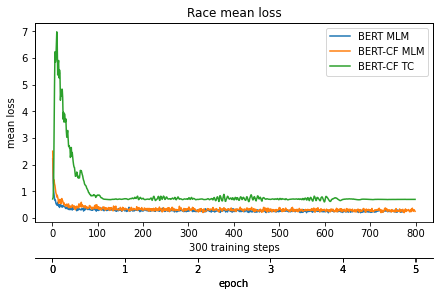

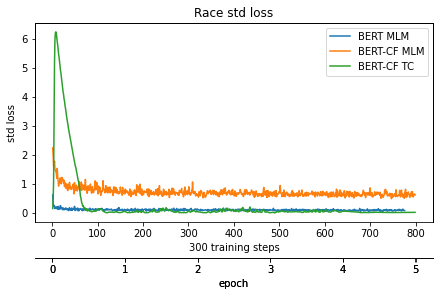

In [283]:
TREATMENT = "Race"
for agg_f in ("mean", "std"):
    fig, ax = plt.subplots(constrained_layout=True)
    plot_losses(ax, POMS_MLM_LOSSES, {"mlm_loss": "MLM_loss"}, "BERT", agg_f, 21)
    plot_losses(ax, RACE_LOSSES, {"mlm_loss": "MLM_loss", "adversarial_loss": "TC_loss"}, "BERT-CF", agg_f)
    ax.set_title(f"{TREATMENT} {agg_f} loss")
    plt.savefig(f"{FIGURES_DIR}/{TREATMENT}_{agg_f}_loss.png")
    plt.show()

# IMA

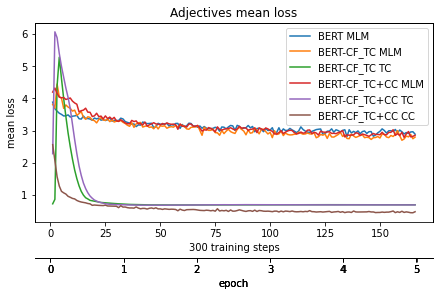

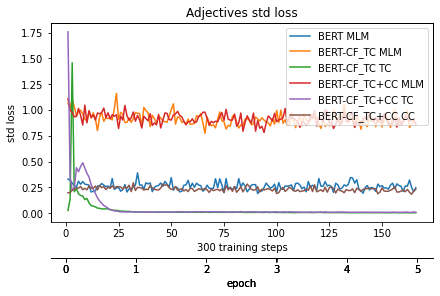

In [284]:
TREATMENT = "Adjectives"
for agg_f in ("mean", "std"):
    fig, ax = plt.subplots(constrained_layout=True)
    plot_losses(ax, IMA_MLM_LOSSES, {"mlm_loss": "MLM_loss"}, "BERT", agg_f, 10)
    plot_losses(ax, IMA_LOSSES, {"mlm_loss": "MLM_loss", "adversarial_loss": "TC_loss"}, "BERT-CF_TC", agg_f)
    plot_losses(ax, IMA_CONTROL_LOSSES, {"mlm_loss": "MLM_loss", "adversarial_loss": "TC_loss", "control_loss": "CC_loss"}, f"BERT-CF_TC+CC", agg_f)
    ax.set_title(f"{TREATMENT} {agg_f} loss")
    plt.savefig(f"{FIGURES_DIR}/{TREATMENT}_{agg_f}_loss.png")
    plt.show()

# Topics (Treatment + Control for books domain)

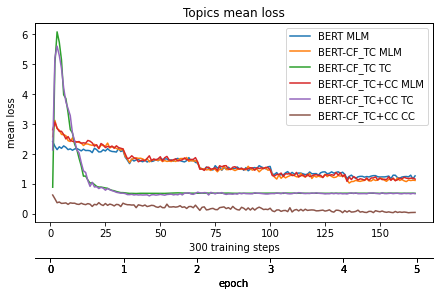

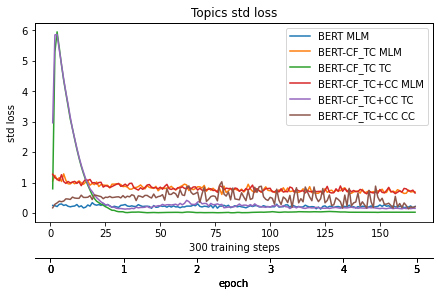

In [285]:
TREATMENT = "Topics"
for agg_f in ("mean", "std"):
    fig, ax = plt.subplots(constrained_layout=True)
    plot_losses(ax, TOPICS_MLM_LOSSES, {"mlm_loss": "MLM_loss"}, "BERT", agg_f, 10)
    plot_losses(ax, TOPICS_LOSSES, {"mlm_loss": "MLM_loss", "treatment_loss": "TC_loss"}, f"BERT-CF_TC", agg_f)
    plot_losses(ax, TOPICS_CONTROL_LOSSES, {"mlm_loss": "MLM_loss", "treatment_loss": "TC_loss", "control_loss": "CC_loss"}, f"BERT-CF_TC+CC", agg_f)
    ax.set_title(f"{TREATMENT} {agg_f} loss")
    plt.savefig(f"{FIGURES_DIR}/{TREATMENT}_{agg_f}_loss.png")
    plt.show()